# **Redes Complexas**
## **Questionário 1**
### Nome Completo:  Matheus Araujo Pinheiro
### E-mail: matheusaraujopinh@gmail.usp.br
### Número USP: 14676810
### Universidade de São Paulo 

In [1]:
# Bibliotecas que seram usadas:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Questão 1: 
#### calculo do terceiro e quarto momento do grau. usando a base lesmis, do livro "Os miseráveis"

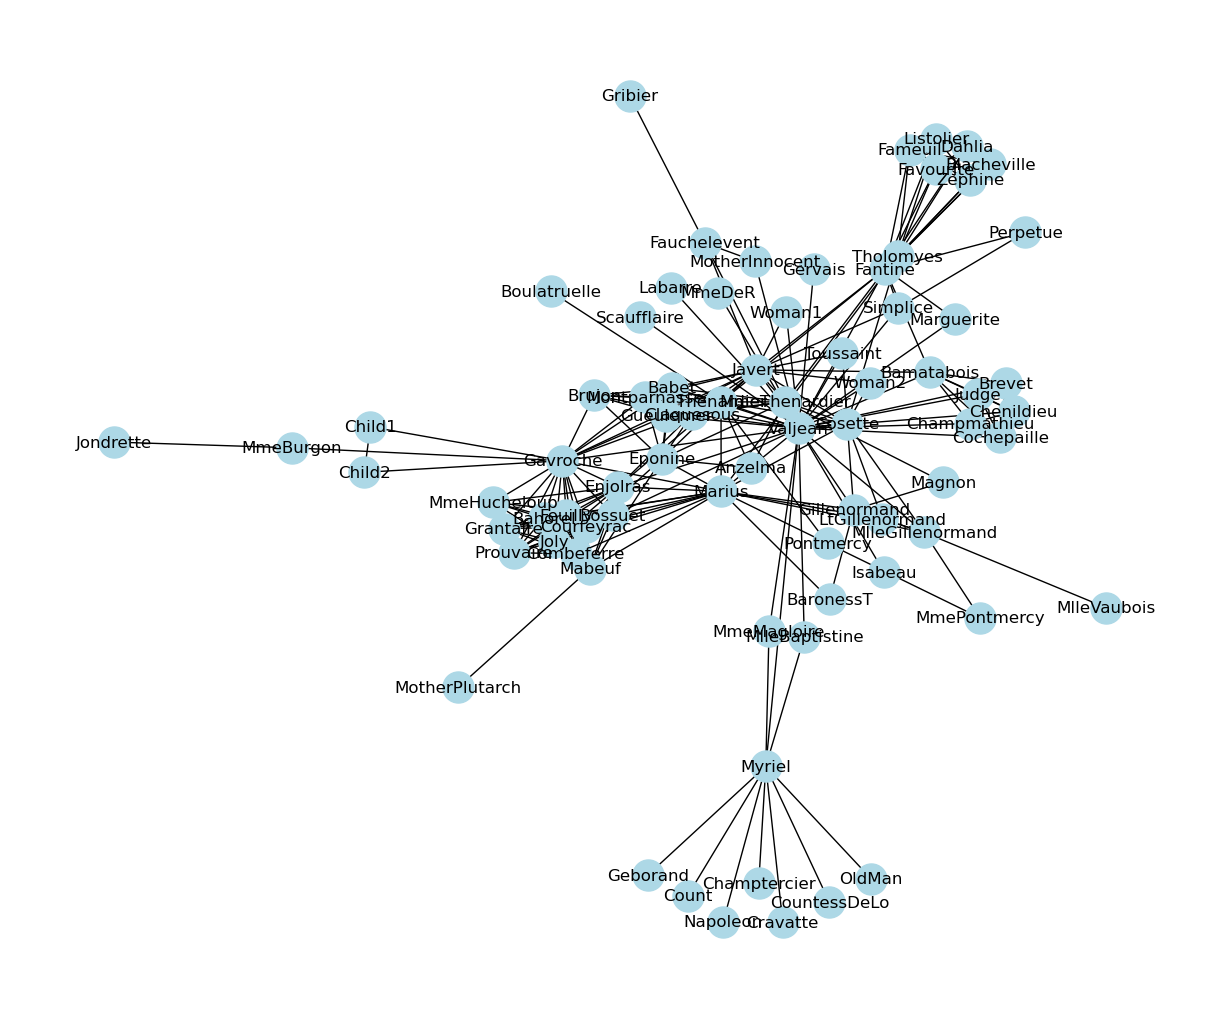

In [2]:
G = nx.read_gml("lesmis.gml") # Lendo a rede
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightblue", node_size=500, with_labels=True)

In [3]:
# Transformando esse grafo em uma rede sem direção
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Pegando apenas a maior componente conexa
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Pegando o numero de nos e numero de arestas, respectivamentre
N = len(G)
M = G.number_of_edges()


graus = dict(G.degree()).values()
graus = np.array(list(graus))

# Calcular média do grau
media_graus = np.mean(graus)

In [4]:
# Função para calcular o momento (RETIRADO DO JUPITER DISPONIBILIZADO PREVIAMENTE)
def momment(Gx,m):
    M = 0
    N = len(Gx)
    for i in Gx.nodes:
        M = M + Gx.degree(i)**m
    M = M/N
    return M

print('Terceiro momento de k:', momment(G,3))
print('Quarto momento de k:', momment(G,4))

Terceiro momento de k: 1408.025974025974
Quarto momento de k: 33592.72727272727


## Questão 2: 
#### implementação de uma rotina para calcular a medida de complexidade da rede de energia eletrica dos EUA, usando a base powergrid

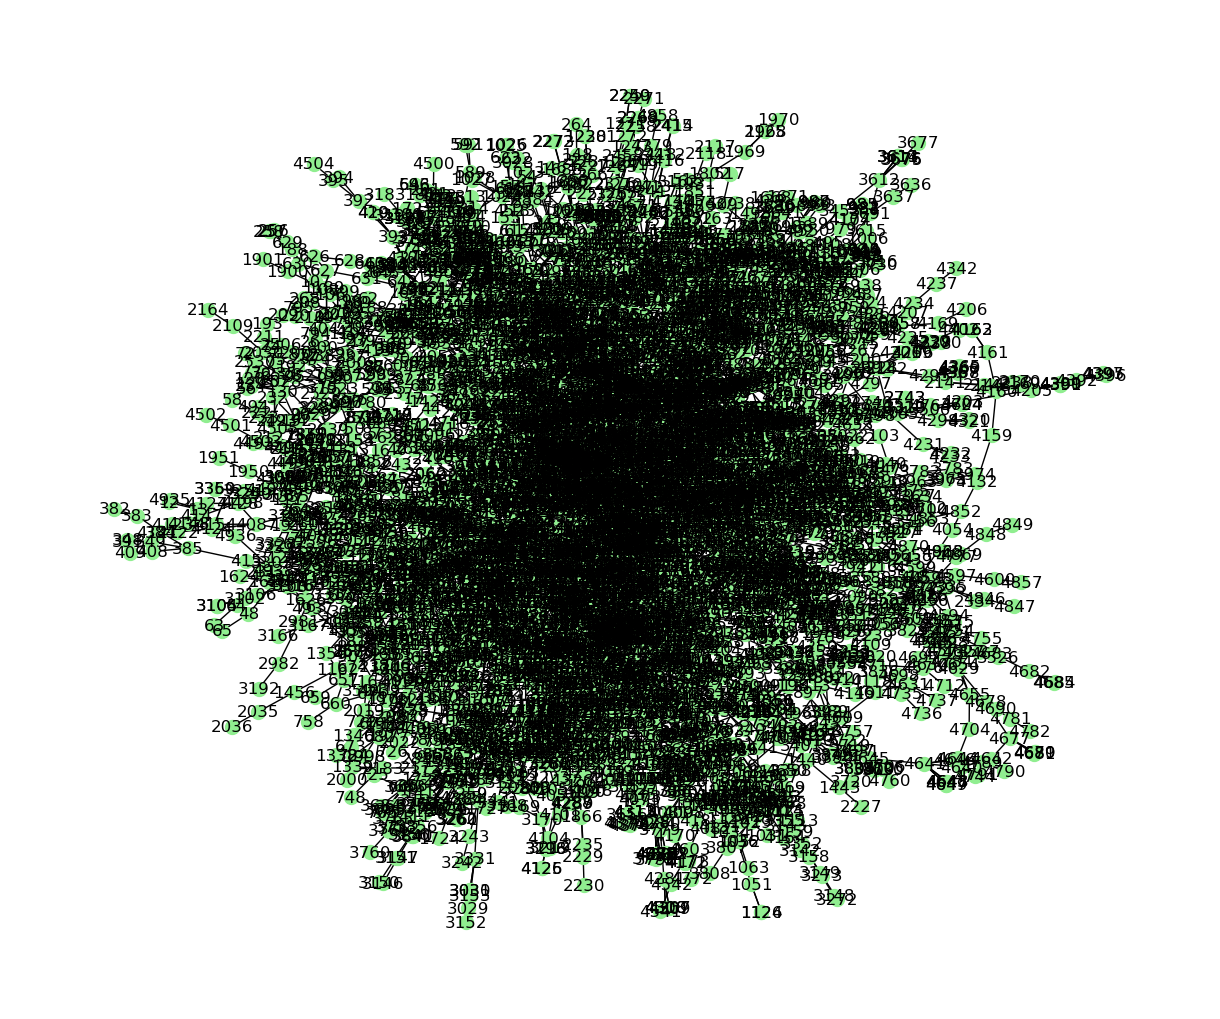

In [5]:
# Lendo o grafo
G2 = nx.read_edgelist("powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="lightgreen", node_size=100, with_labels=True)

In [6]:
# Transformando esse grafo em uma rede sem direção
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))

# Pegando apenas a maior componente conexa
Gcc2 = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(Gcc2[0])
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

# Pegando o numero de nos e numero de arestas, respectivamentre
N2 = len(G2)
M2 = G2.number_of_edges()

In [7]:
def calcular_complexidade(Gx):
    # Calculando os graus dos nós
    graus = [grau for _, grau in Gx.degree()]
    
    # Calculando <k1> - a média dos graus dos nós
    k1 = np.sum(np.fromiter(graus, dtype=float)) / len(graus) if len(graus) > 0 else 0
    
    # Calculando <k2> - a média dos quadrados dos graus dos nós
    k2 = np.sum(np.fromiter((grau**2 for grau in graus), dtype=float)) / len(graus) if len(graus) > 0 else 0
    
    # Calculando alpha = <k2> / <k1>
    alpha = k2 / k1 if k1 != 0 else 0
    return round(alpha, 2)

In [8]:
complex = calcular_complexidade(G2)
print(complex)

3.87


## Questão 3: 
#### implementação de uma rotina para calcular a entropai de shannon para as estradas da Europa, usando a base powergrid

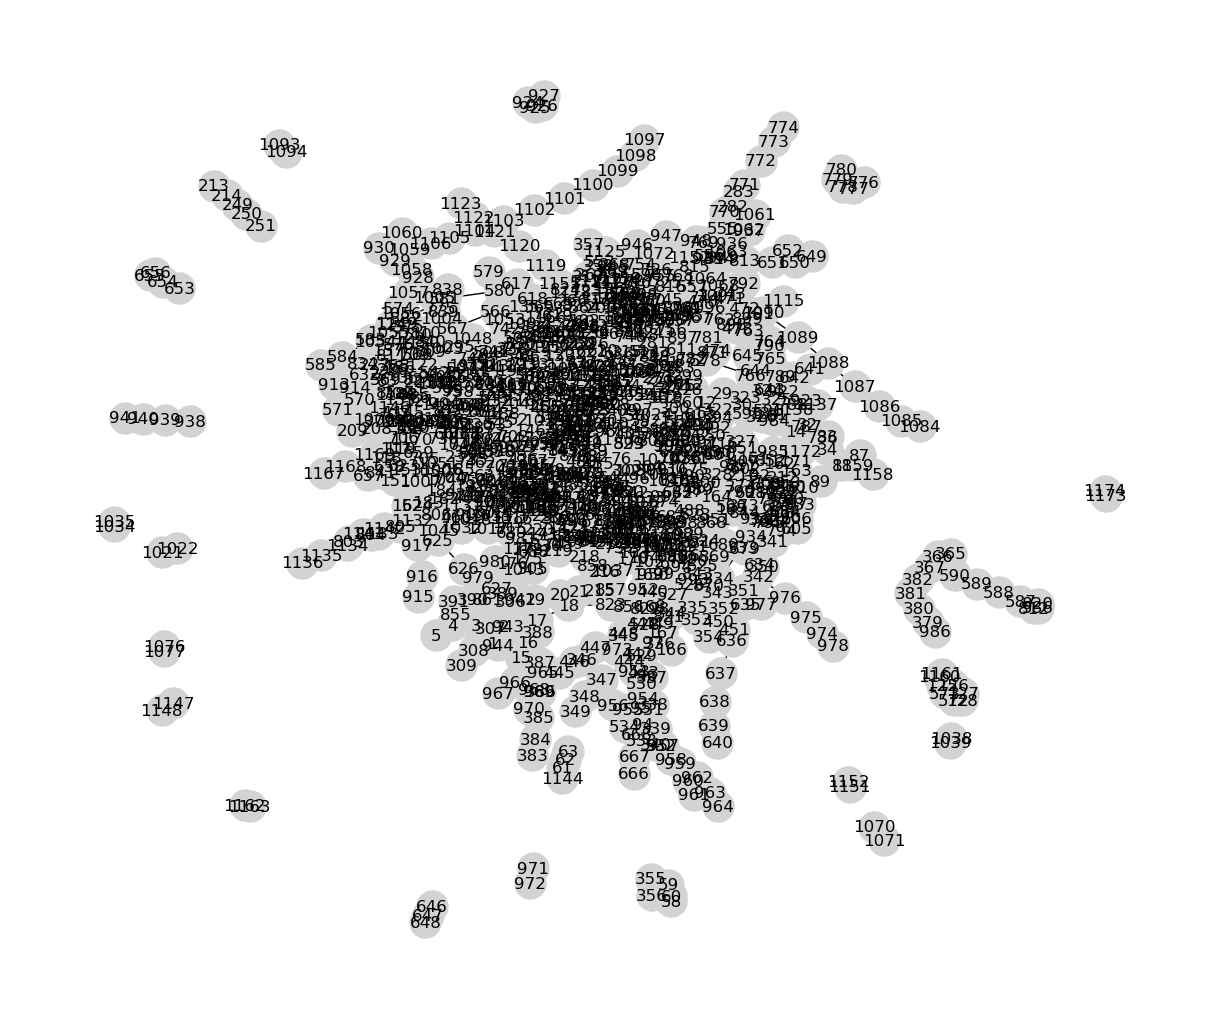

In [9]:
# Lendo o grafo
G3 = nx.read_edgelist("euroroad.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="lightgray", node_size=500, with_labels=True)

In [10]:
# Calcula a medida de complexidade da rede baseada na entropia do grau.   
# Recebe o grau da rede e retorna a medida de complexidade baseada na entropia do grau.
def entropia_shannon(Gx):

    graus = np.array([d for _, d in Gx.degree()])  # Lista de graus dos nós
    graus_u, counts = np.unique(graus, return_counts=True)  # Contagem dos graus únicos
    prob = counts / counts.sum()  # Probabilidades dos graus
    prob = prob[prob > 0] # Remover elementos com probabilidade zero para evitar erro numérico
    entropia_shannon = -np.sum(prob * np.log2(prob))  # Entropia de Shannon
    
    return round(entropia_shannon, 2)

In [11]:
print(entropia_shannon(G3))

2.0


## Questão 4, 5: 
#### calculo das medidas de transitividade, do coeficiente de clustering medio, do coeficiente de complexidade e da entropia de shannon para a rede de aeroportos dos EUA, usandoi a base usairport

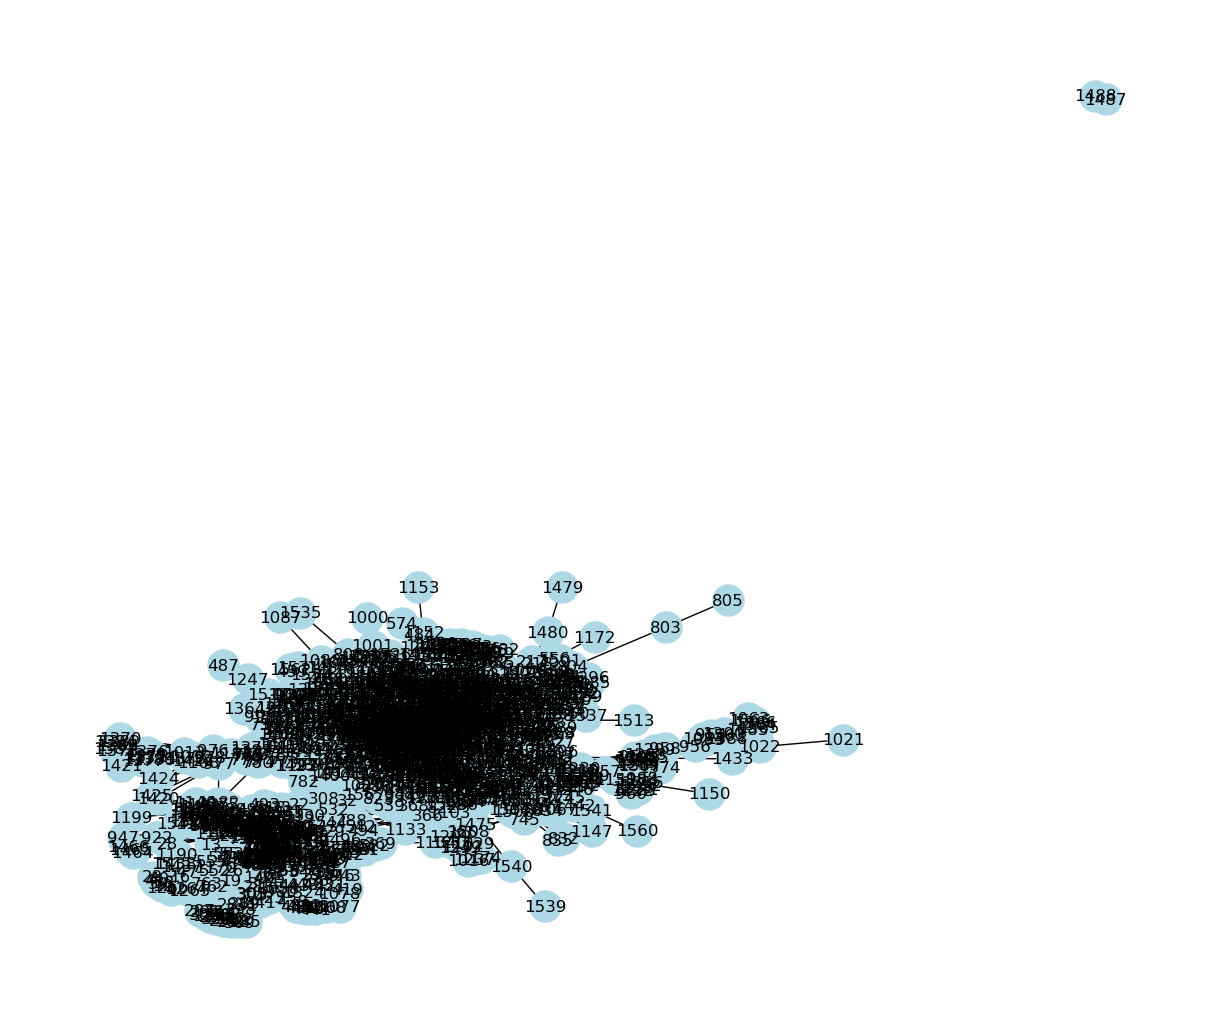

In [12]:
# Funcao para ler arestas e ignorar dados extras
def ler_arestas_sem_dados_extra(arquivo):
    # Le o arquivo e ignora qualquer coisa depois do segundo valor (par de nós)
    arestas = []
    with open(arquivo, 'r') as f:
        for linha in f:
            partes = linha.strip().split()  # Divide a linha em partes
            if len(partes) >= 2:
                # Adiciona a aresta, ignorando qualquer dado extra
                arestas.append((int(partes[0]), int(partes[1])))
    return arestas

# Ler as arestas do arquivo
arestas = ler_arestas_sem_dados_extra("usairport.txt")

# Criar o grafo a partir das arestas
G5 = nx.Graph()
G5.add_edges_from(arestas)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G5)
nx.draw(G5, pos, node_color="lightblue", node_size=500, with_labels=True)

In [16]:
# Calculo da transitivade e da clusteting medio
transitividade = (nx.transitivity(G5))
avc = nx.average_clustering(G5)

print(round(transitividade, 2))
print(round(avc, 2))

0.38
0.5


In [17]:
# Calculo da entropia de shannon usando a funcao definida anteriormente na questao 3
ent_shannon = entropia_shannon(G5)
print(ent_shannon)

4.99


In [18]:
# Calculo do coeficiente de complexidade
complex_g5 = calcular_complexidade(G5)
print(complex_g5)

112.22
